In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)


def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName , dtype = None , delimiter =',', skip_header =1)
    features_X = data [: , :3]
    sales_Y = data [: , 3]
    features_X = np.concatenate((np.ones((len(sales_Y), 1)), features_X), axis =1)
    return features_X , sales_Y

features_X , _ = load_data_from_file()
print(features_X [:5 ,:])
    

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
def create_individual(n =4 , bound =10):
    individual = []
    for _ in range(n):
        gene = random.uniform(-bound/2, bound/2)
        individual.append(gene)
    return individual

individual = create_individual()
print(individual)
    

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [6]:
features_X , sales_Y = load_data_from_file()
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y),(y_hat - sales_Y)). mean()
    return loss
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    if loss != 0:
        fitness_value = 1/(loss + 1)
    return fitness_value

    
    
features_X , sales_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [9]:
def crossover(individual1 , individual2 , crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random()< crossover_rate :
        n = len(individual1)
        crossover_point = random.randint(0 , n -1)
        individual1_new = individual1 [: crossover_point ] + individual2 [ crossover_point :]
        individual2_new = individual2 [: crossover_point ] + individual1 [ crossover_point :]
            
    
    return individual1_new , individual2_new

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover(individual1 , individual2 , 2.0)
print(" individual1 : " , individual1)
print(" individual2 : " , individual2)

 individual1 :  [4.09, 4.82, -0.79, -2.41]
 individual2 :  [3.44, 2.57, 3.1, 4.02]


In [10]:
def mutate(individual , mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random()< mutation_rate :
            individual_m [ i ] = random.uniform(-10/2 , 10/2)
    return individual_m

In [11]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(individual , mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
    population = [ create_individual()for _ in range(m)]
    return population

In [13]:
def selection(sorted_old_population , m = 100):
    index1 = random.randint(0 , m -1)
    while True :
        index2 = random.randint(0 , m -1)
        if(index2 != index1):
            break
    individual_s = sorted_old_population [ index1 ]
    if index2 > index1 :
        individual_s = sorted_old_population [ index2 ]
    return individual_s

In [14]:
def create_new_population(old_population , elitism =2 , gen =1):
    m = len(old_population)
    sorted_population = sorted(old_population , key = compute_fitness)
    if gen %1 == 0:
        print(" Best loss :" , compute_loss(sorted_population [m -1]), " with chromsome : " ,sorted_population [m -1])
    new_population = []
    while len(new_population)< m - elitism :
    # selection
        parent1 = selection(sorted_population)
        parent2 = selection(sorted_population)
    # crossover
        child1, child2 = crossover(parent1, parent2)
    # mutation
        child1 = mutate(child1)
        child2 = mutate(child2)
        
        new_population.append(child1)
        if len(new_population)< m:
            new_population.append(child2)
            
    for ind in sorted_population [m - elitism :]:
        new_population.append(ind)
        
    return new_population , compute_loss(sorted_population [m -1])

In [15]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population(old_population , elitism =2 , gen =1)

 Best loss : 123415.051528805  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [20]:
def run_GA():
    n_generations = 100
    m = 600
    features_X , sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i+1)
        losses_list.append(best_loss)
    return losses_list

 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chromsome :  [-0.09850196998754424, -0.14330970767126594, 2.0364059712669533, -0.5373712782282771]
 Best loss : 1003.9939338964188  with chr

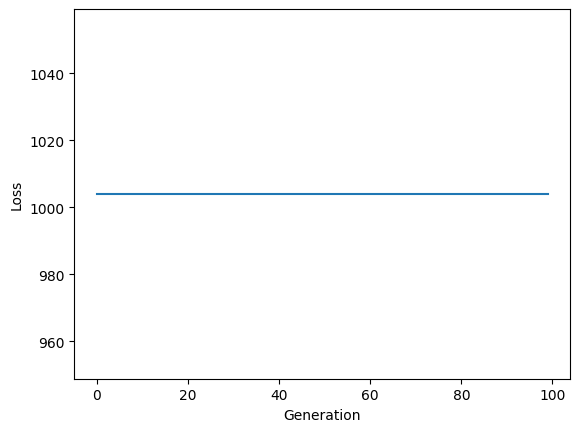

In [21]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel("Generation")
    plt.ylabel("Loss")
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[0.2420660386054827, 0.36594396707625076, -0.6702754564975297, -0.3586633153031755]


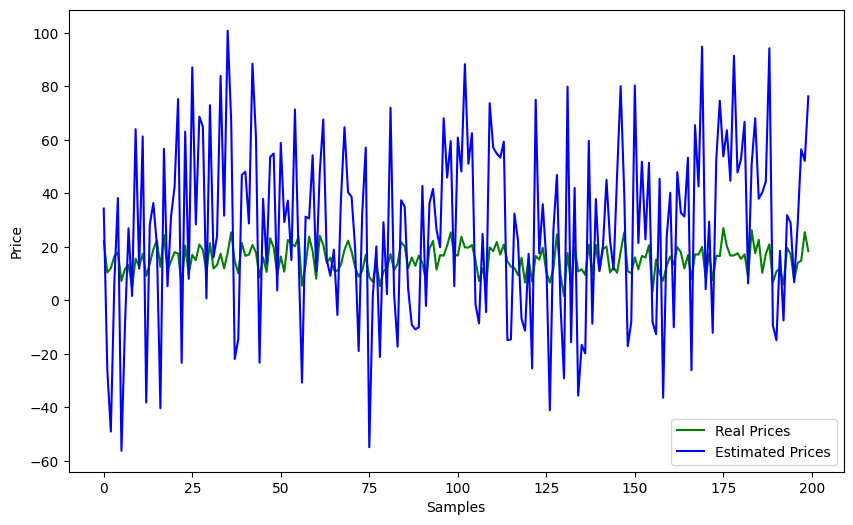

In [23]:
def visualize_predict_gt(population):
    # visualization of ground truth and predict value
    sorted_population = sorted(population , key = compute_fitness)
    print(sorted_population [ -1])
    theta = np.array(sorted_population [ -1])
    estimated_prices = []
    for feature in features_X :
    # ************* your code here *************
        estimated_prices.append(np.dot(feature, theta))
        
    fig , ax = plt.subplots(figsize =(10 , 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y , c ='green', label ='Real Prices')
    plt.plot(estimated_prices , c ='blue', label ='Estimated Prices')
    plt.legend()
    plt.show()
    
visualize_predict_gt(population=initializePopulation(600))